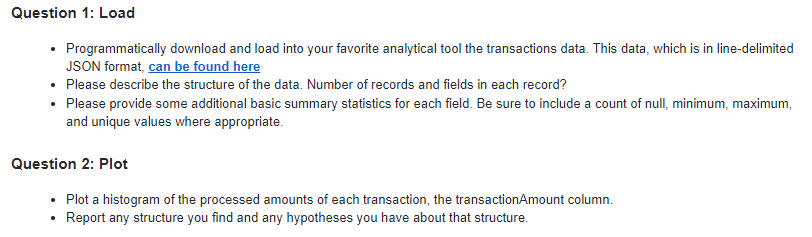

In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
pd.options.display.max_columns = None
pd.options.display.max_rows =30
import random

In [2]:
data = pd.read_json('transactions.txt',lines=True)
data.head(3)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False


In [3]:
print("Number of rows in data are : ",len(data),' and number of columns are ',len(data.columns))

Number of rows in data are :  786363  and number of columns are  29


### • We see there are 786363 rows and 29 columns in the data.

In [4]:
data['transactionDateTime'] = pd.to_datetime(data['transactionDateTime'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             786363 non-null  int64         
 1   customerId                786363 non-null  int64         
 2   creditLimit               786363 non-null  int64         
 3   availableMoney            786363 non-null  float64       
 4   transactionDateTime       786363 non-null  datetime64[ns]
 5   transactionAmount         786363 non-null  float64       
 6   merchantName              786363 non-null  object        
 7   acqCountry                786363 non-null  object        
 8   merchantCountryCode       786363 non-null  object        
 9   posEntryMode              786363 non-null  object        
 10  posConditionCode          786363 non-null  object        
 11  merchantCategoryCode      786363 non-null  object        
 12  cu

### • The data head showed some blank values in Merchant City and State column, so replacing blanks with NaN.

In [5]:
data.replace('',np.nan,inplace=True)

In [6]:
print(data.isnull().sum())

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

### • Droping columns where all rows are blank.

In [7]:
data.drop(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip','posOnPremises','recurringAuthInd'],axis=1,inplace=True)

### Checking if accountNumber and customerID is always same in the entire data, if yes, droping one column

In [8]:
data['col'] = np.where(data['accountNumber']==data['customerId'],'equal','not equal')
data['col'].value_counts().to_frame()

,col
equal,786363


In [9]:
data.drop(['accountNumber', 'col'],axis=1,inplace=True)

In [10]:
data['transactionDateTime'] = pd.to_datetime(data['transactionDateTime'])
data['accountOpenDate']=pd.to_datetime(data['accountOpenDate']) 
data.describe(datetime_is_numeric=True)

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,accountOpenDate,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,786363.000000,786363.000000,786363,786363.000000,786363,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,10759.464459,6250.725369,2016-07-06 01:58:58.395681536,136.985791,2014-02-03 01:11:17.352825856,544.467338,544.183857,4757.417799,4508.739089
min,1.000881e+08,250.000000,-1005.630000,2016-01-01 00:01:02,0.000000,1989-08-22 00:00:00,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,5000.000000,1077.420000,2016-04-06 19:35:07,33.650000,2013-06-29 00:00:00,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,7500.000000,3184.860000,2016-07-08 05:03:57,87.900000,2014-09-05 00:00:00,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,15000.000000,7500.000000,2016-10-05 13:52:03.500000,191.480000,2015-05-04 00:00:00,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,50000.000000,50000.000000,2016-12-30 23:59:45,2011.540000,2015-12-31 00:00:00,998.000000,998.000000,9998.000000,47498.810000
std,2.554211e+08,11636.174890,8880.783989,NaN,147.725569,NaN,261.524220,261.551254,2996.583810,6457.442068


### • transactionDateTime shows that data is collected between Jan 2016-Dec 2016

In [11]:
data.columns

Index(['customerId', 'creditLimit', 'availableMoney', 'transactionDateTime',
       'transactionAmount', 'merchantName', 'acqCountry',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [12]:
creditLimit=data['creditLimit'].value_counts().to_frame()
creditLimit

,creditLimit
5000,201863
15000,139307
7500,97913
2500,75429
20000,68629
10000,56889
50000,48781
1000,36430
250,34025
500,27097


In [14]:
'availableMoney'

'availableMoney'

In [15]:
'transactionAmount'

'transactionAmount'

In [16]:
'merchantName'

'merchantName'

In [17]:
acqCountry=data['acqCountry'].value_counts().to_frame()
acqCountry

,acqCountry
US,774709
MEX,3130
CAN,2424
PR,1538


In [18]:
merchantCountryCode=data['merchantCountryCode'].value_counts().to_frame()
merchantCountryCode

,merchantCountryCode
US,778511
MEX,3143
CAN,2426
PR,1559


In [19]:
posEntryMode=data['posEntryMode'].value_counts().to_frame()
posEntryMode

,posEntryMode
05,315035
09,236481
02,195934
90,19576
80,15283


In [20]:
posConditionCode=data['posConditionCode'].value_counts().to_frame()
posConditionCode

,posConditionCode
01,628787
08,149634
99,7533


In [21]:
merchantCategoryCode=data['merchantCategoryCode'].value_counts().to_frame()
merchantCategoryCode

,merchantCategoryCode
online_retail,202156
fastfood,112138
entertainment,80098
food,75490
online_gifts,66238
rideshare,51136
hotels,34097
fuel,23910
subscriptions,22901
auto,21651


In [22]:
transactionType=data['transactionType'].value_counts().to_frame()
transactionType

,transactionType
PURCHASE,745193
REVERSAL,20303
ADDRESS_VERIFICATION,20169


In [23]:
cardPresent=data['cardPresent'].value_counts().to_frame()
cardPresent

,cardPresent
False,433495
True,352868


Text(0.5, 1.0, 'Relationship between Card Present Transactions and Fraudulent Transactions')

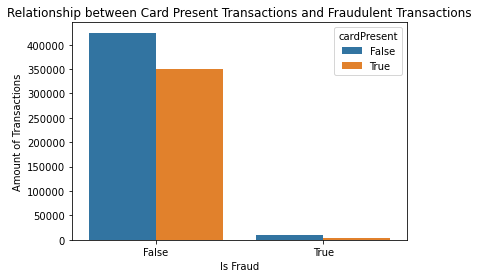

In [26]:
sns.countplot(data=data, x='isFraud', hue='cardPresent')
plt.xlabel('Is Fraud')
plt.ylabel('Amount of Transactions')
plt.title('Relationship between Card Present Transactions and Fraudulent Transactions')

In [24]:
expirationDateKeyInMatch=data['expirationDateKeyInMatch'].value_counts().to_frame()
expirationDateKeyInMatch

,expirationDateKeyInMatch
False,785320
True,1043


In [27]:
isFraud=data['isFraud'].value_counts().to_frame()
isFraud

,isFraud
False,773946
True,12417
